In [1]:
import sys

sys.path.insert(0, "C:/Users/julie/PycharmProjects/SoundLandscape/")

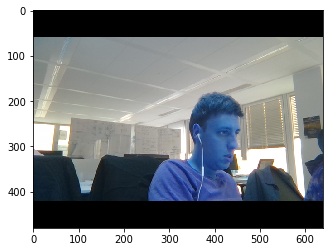

In [11]:
# -*- coding: utf-8 -*-
import cv2

from flask import Response
import matplotlib.pyplot as plt


class VideoCamera(object):
    """Read video from camera."""

    def __init__(self, camera=0):
        """Initiator.

        :param camera: (int) camera id
        """
        self.camera = camera
        self.video = cv2.VideoCapture(camera)

    def __del__(self):
        """Delete instance video."""
        self.video.release()

    def get_frame(self):
        """Get frame from camera.

        :return: (np.array) image
        """
        success, frame = self.video.read()
        if success:
            return frame
        else:
            return "Error"

    def __gen__(self):
        """Video streaming generator function."""
        while True:
            frame = self.get_frame()
            yield (b'--frame\r\n'
                   b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')

    def streaming_images(self):
        """Streaming video to web.

        :return: (flask.Response) image for html
        """
        return Response(self.__gen__(), mimetype='multipart/x-mixed-replace; boundary=frame')

    
if __name__ == '__main__':
    obj = VideoCamera(0)
    frame = obj.get_frame()
    plt.imshow(frame)